In [1]:
# Install Required Libraries
! pip install numpy pandas scikit-learn tensorflow keras statsmodels arch matplotlib

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/37/08/acd7fbc1e15b4701b5be3acd6fd575865a274885ea6bc72ec7af909cc7e5/arch-7.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/924.9 kB 330.3 kB/s eta 0:00:03
   -- ------------------------------------ 61.4/924.9 kB 550.5 kB/s eta 0:00:02
   ----- -------------------------------- 122.9/924.9 kB 804.6 kB/s eta 0:00:01
   ----------- ---------------------------- 256.0/924.9 kB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 358.4/924.9 kB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 471.0/924.9 kB 1.6 MB/s eta 0:00:01
   ----------------------- ---------------- 553.0/924.9 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 645.1/924.9 kB 1.6 MB/s eta 0:00:01
   ------------

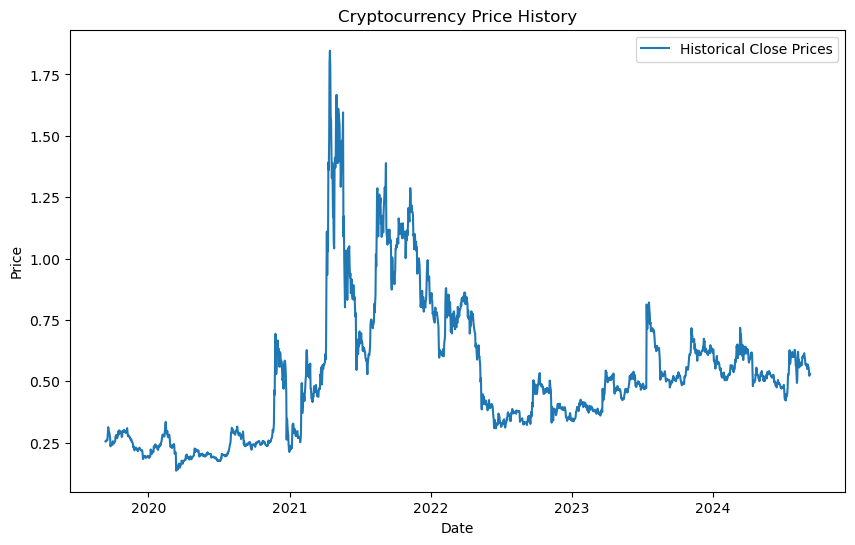

In [3]:
# Load and Prepare Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load cryptocurrency dataset
df = pd.read_csv('ripple_2019-09-11_2024-09-09.csv')

# Use 'End' column as the date (instead of 'Date')
df['End'] = pd.to_datetime(df['End'])

# Extract close prices
data = df[['End', 'Close']]

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(data['End'], data['Close'], label='Historical Close Prices')
plt.title('Cryptocurrency Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [4]:
# Preprocess Data for LSTM
# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define helper function to create dataset for LSTM
def create_lstm_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare LSTM dataset with 60 time steps
time_step = 60
X_train, y_train = create_lstm_dataset(scaled_data, time_step)

# Reshape input for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [5]:
# Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)


Epoch 1/10


C:\Users\hanss\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0133
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0023
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0015
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0015
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0014
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0014
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.2847e-04


In [6]:
# ARIMA Model for Trend Prediction
from statsmodels.tsa.arima.model import ARIMA

# Differencing to make data stationary
diff_data = data['Close'].diff().dropna()

# Fit ARIMA model (p, d, q)
arima_model = ARIMA(diff_data, order=(5, 1, 2))
arima_result = arima_model.fit()

# Forecast for 365 days
arima_forecast = arima_result.forecast(steps=365)


C:\Users\hanss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hanss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hanss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hanss\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hanss\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

In [7]:
# GARCH Model for Volatility Prediction
from arch import arch_model

# Fit GARCH model for volatility
garch_model = arch_model(diff_data, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp="off")

# Forecast volatility for 365 days
garch_forecast = garch_result.forecast(horizon=365)
volatility_forecast = garch_forecast.variance[-1:]


C:\Users\hanss\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00143. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [9]:
# Combine LSTM, ARIMA, and GARCH Predictions
# Prepare test data for LSTM (last 60 days)
test_data = scaled_data[-time_step:]
X_test = np.array([test_data])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the next 365 days using LSTM
lstm_predictions = []
for _ in range(365):
    lstm_pred = lstm_model.predict(X_test)
    lstm_predictions.append(lstm_pred[0, 0])

    # Reshape the prediction to match the dimensions of X_test before appending
    lstm_pred_reshaped = np.reshape(lstm_pred[0, 0], (1, 1, 1))
    
    # Append new prediction to the test set and continue forecasting
    X_test = np.append(X_test[:, 1:, :], lstm_pred_reshaped, axis=1)

# Combine LSTM, ARIMA, and GARCH predictions
combined_forecast = []
for i in range(365):
    combined_pred = lstm_predictions[i] + arima_forecast[i] + np.sqrt(volatility_forecast[i])
    combined_forecast.append(combined_pred)

# Create future dates for the forecast
future_dates = pd.date_range(data['Date'].max(), periods=365)

# Plot the combined forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Historical Close Price')
plt.plot(future_dates, combined_forecast, label='Hybrid Model Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cryptocurrency Price Forecast (Hybrid LSTM-ARIMA-GARCH)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

KeyError: 0